<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-2-Applied-Modeling/blob/master/Jen_Banks_Walmart_project_on_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

Reading 3 dataframes

In [9]:
sales_train=pd.read_csv('/content/sales_train_validation.csv')
print(sales_train.shape)
sales_train.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [10]:
#Contains information about the dates on which the products are sold.

calendar=pd.read_csv('calendar.csv')
print(calendar.shape)
calendar.tail(2)

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [13]:
#Contains information about the price of the products sold per store and date.

sell_prices=pd.read_csv('/content/sell_prices.csv')
print(sell_prices.shape)
sell_prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Taking subsets of the 3 dataframes

In [14]:
# Take subset of "calendar" df for on or before June 30, 2011 only
 
calendar['date']=pd.to_datetime(calendar['date'], infer_datetime_format=True)

calendar_subset= calendar[calendar.date<=pd.to_datetime('2011-06-30')]
print(calendar_subset.shape)
calendar_subset.tail()


(153, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
148,2011-06-26,11122,Sunday,2,6,2011,d_149,NaN,NaN,NaN,NaN,0,0,0
149,2011-06-27,11122,Monday,3,6,2011,d_150,NaN,NaN,NaN,NaN,0,0,0
150,2011-06-28,11122,Tuesday,4,6,2011,d_151,NaN,NaN,NaN,NaN,0,0,0
151,2011-06-29,11122,Wednesday,5,6,2011,d_152,NaN,NaN,NaN,NaN,0,0,0
152,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0


In [15]:
# Take subset of "sell_prices" df for 2011-2012 only

sell_subset= sell_prices[sell_prices.wm_yr_wk<=11122]
print(sell_subset.shape)
sell_subset.tail()

(308477, 4)


,store_id,item_id,wm_yr_wk,sell_price
6840587,WI_3,FOODS_3_825,11118,4.38
6840588,WI_3,FOODS_3_825,11119,4.38
6840589,WI_3,FOODS_3_825,11120,4.38
6840590,WI_3,FOODS_3_825,11121,4.38
6840591,WI_3,FOODS_3_825,11122,4.38


In [22]:
# Take subset of "sales_train" df for d<=d_337

sale_subset= pd.DataFrame(sales_train.loc[:,'id':'d_153'])
print(sale_subset.shape)
sale_subset.tail()

(30490, 159)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,2,3,1,0,1,1,1,1,1,3,0,0,1,2,1,0,1,3,1,2,2,0,3,2,1,0,0,1,2,0,0,0,0,0,2,0,2,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,2,1,1,0,0,0,0,0,2,0,2,0,2,2,0,1,1,1,2,1,3,0,2,1,1,1,1,2,1,0,1,0,2,1,0,1,2,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merging calendar_subset and sell_subset

In [23]:
#Merge "sell_sample" and "calendar" on `wm_yr_wk`

sell_calendar=pd.merge(calendar_subset,sell_subset, on=['wm_yr_wk'])
print(sell_calendar.shape)
sell_calendar.tail(2)

(2144121, 17)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price
2144119,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0,WI_3,FOODS_3_824,2.48
2144120,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0,WI_3,FOODS_3_825,4.38


In [24]:
#Adding and "id" column in `sell_calendar`

sell_calendar['id']=sell_calendar['item_id']+'_'+sell_calendar['store_id']+'_validation'

print(sell_calendar.shape)
sell_calendar.head(2)

(2144121, 18)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price,id
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,HOBBIES_1_008,0.46,HOBBIES_1_008_CA_1_validation
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,HOBBIES_1_009,1.56,HOBBIES_1_009_CA_1_validation


In [0]:
sell_calendar=sell_calendar.drop(columns=['store_id', 'item_id'], axis=1)

In [26]:
#Merge "sell_calendar" and "sale_subset" on `id`

sales=pd.merge(sale_subset, sell_calendar, on=['id'])
print(sales.shape)
sales.head(2)

(2144121, 174)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2011-06-18,11121,Saturday,1,6,2011,d_141,NaN,NaN,NaN,NaN,0,0,0,3.97
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2011-06-19,11121,Sunday,2,6,2011,d_142,Father's day,Cultural,NaN,NaN,0,0,0,3.97


In [27]:
sales= sales.drop(columns=['id', 'item_id', 'dept_id', 'year', 'date'], axis=1)
sales.shape

(2144121, 169)

In [28]:
sales.head(3)

,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,...,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,wm_yr_wk,weekday,wday,month,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Saturday,1,6,d_141,NaN,NaN,NaN,NaN,0,0,0,3.97
1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Sunday,2,6,d_142,Father's day,Cultural,NaN,NaN,0,0,0,3.97
2,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Monday,3,6,d_143,NaN,NaN,NaN,NaN,0,0,0,3.97


In [29]:
# Randomly sample 10% of your "sales" dataframe

sale_sample = sales.sample(frac=0.20, random_state=42)
sale_sample.shape

(428824, 169)

 target = cat_id, split on month where test set =June sales

In [30]:
test=sale_sample[sale_sample['month']==6]
print(test.shape)


(90921, 169)


In [31]:
train=sale_sample[sale_sample['month']<6]
print(train.shape)
train.tail(2)

(337903, 169)


,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,...,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,wm_yr_wk,weekday,wday,month,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
750757,HOUSEHOLD,CA_4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11113,Friday,7,4,d_91,NaN,NaN,NaN,NaN,0,0,0,7.94
884863,HOBBIES,TX_1,TX,10,0,0,0,1,8,1,3,4,2,0,0,0,0,0,2,2,0,0,1,0,1,0,3,0,4,3,0,1,0,0,0,0,0,0,0,32,...,0,0,0,4,0,6,0,7,0,0,6,0,1,1,0,0,0,0,0,6,2,0,4,0,0,0,0,11116,Saturday,1,5,d_106,NaN,NaN,NaN,NaN,0,0,1,0.54


In [0]:
#Data Wrangling

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.fillna('Missing')
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
test = wrangle(test)

In [33]:
train.shape, test.shape

((337903, 169), (90921, 169))

In [0]:
#Assigning target/features columns

target='cat_id'

features = train.drop(columns=[target]).columns.tolist()

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test=test[target]

In [35]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.7MB/s 


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
X_test.shape

(90921, 168)

In [38]:
# Using randomforest classifier

from sklearn.ensemble import RandomForestClassifier

pipeline_rf=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=50)
)

pipeline_rf.fit(X_train, y_train)
print('Training set score', pipeline_rf.score(X_train, y_train))
print('Testing set score', pipeline_rf.score(X_test, y_test))

Training set score 1.0
Testing set score 0.9946547002342693


In [39]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FOODS        0.467859
HOUSEHOLD    0.354378
HOBBIES      0.177763
Name: cat_id, dtype: float64

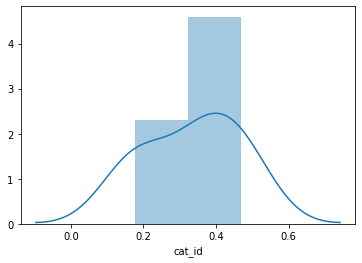

In [40]:
# The distribution has improved, but is still right-skewed
y = sale_sample['cat_id'].value_counts(normalize=True)
sns.distplot(y);
y

In [41]:
len(train[features].columns)

168

In [42]:
len(pipeline_rf.named_steps['randomforestclassifier'].feature_importances_)

326

In [43]:
#With RandomizedSearchCV on RandomforestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline_rf_rand=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier()
)

param_distribution={
    'simpleimputer__strategy':['mean','most_frequent', 'median'],
    'randomforestclassifier__max_depth':[3,5,10],
    'randomforestclassifier__n_estimators':[10,20,30],
    'randomforestclassifier__criterion':['gini', 'entropy']
}

search=RandomizedSearchCV(
    pipeline_rf_rand,
    param_distributions=param_distribution,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    verbose=10,
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Training set score', search.score(X_train, y_train))
print('Testing set score', search.score(X_test, y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.5min finished


Training set score 0.7358413509202345
Testing set score 0.7181179265516218


In [44]:
print("Best Parameters", search.best_params_)
print("Best Accuracy score", search.best_score_)

Best Parameters {'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 10, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
Best Accuracy score 0.7294755872522066


In [45]:
# Applying the given hyperparameters

classifier=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    RandomForestClassifier(criterion='gini',
                           max_depth= 10,                           
                           n_estimators=10)
)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.7303960012192848
0.712992597969666


##Plotting feature importances 

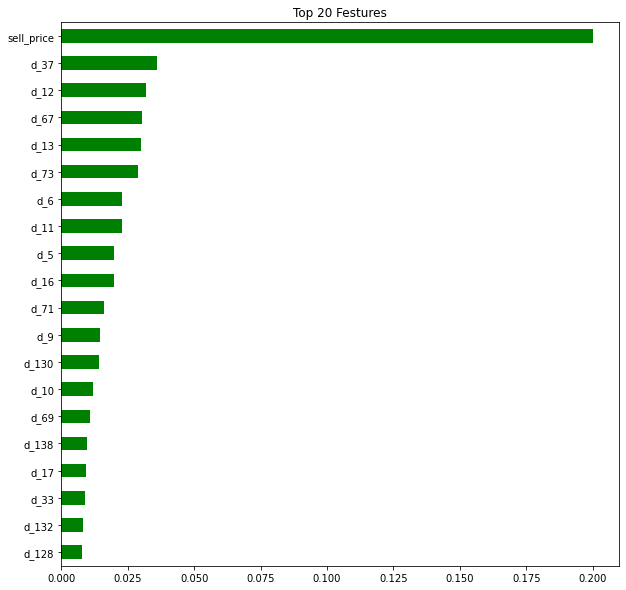

In [46]:

%matplotlib inline
import matplotlib.pyplot as plt

rf=classifier.named_steps['randomforestclassifier']
importances= pd.Series(rf.feature_importances_, train[features].columns)

# Plot top n feature importances
n= 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Festures')
importances.sort_values()[-n:].plot.barh(color='green');